In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [2]:
data = pd.read_csv('D:\Assignment\Decision Tree\Fraud_check.csv')

In [3]:
data.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data['Undergrad'].replace(to_replace=['YES', 'NO'],value= ['0', '1'], inplace=True)
data['Urban'].replace(to_replace=['YES', 'NO'],value= ['0', '1'], inplace=True)
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,1,Single,68833,50047,10,0
1,0,Divorced,33700,134075,18,0
2,1,Married,36925,160205,30,0
3,0,Single,50190,193264,15,0
4,1,Married,81002,27533,28,1
...,...,...,...,...,...,...
595,0,Divorced,76340,39492,7,0
596,0,Divorced,69967,55369,2,0
597,1,Divorced,47334,154058,0,0
598,0,Married,98592,180083,17,1


In [6]:
#Complete fraud check dataset
label_encoder = preprocessing.LabelEncoder()
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status']) 

In [7]:
x=data.drop(columns=['Marital.Status'])


In [8]:
y=data['Marital.Status']


In [9]:
x

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban
0,1,68833,50047,10,0
1,0,33700,134075,18,0
2,1,36925,160205,30,0
3,0,50190,193264,15,0
4,1,81002,27533,28,1
...,...,...,...,...,...
595,0,76340,39492,7,0
596,0,69967,55369,2,0
597,1,47334,154058,0,0
598,0,98592,180083,17,1


In [10]:
y

0      2
1      0
2      1
3      2
4      1
      ..
595    0
596    0
597    0
598    1
599    0
Name: Marital.Status, Length: 600, dtype: int32

In [11]:
data['Marital.Status'].unique() 

array([2, 0, 1])

In [12]:
# Splitting data into training and testing data set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40) 

In [13]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

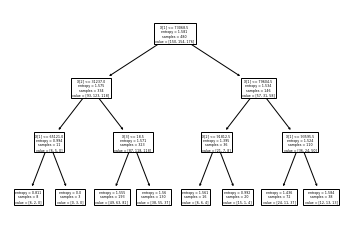

In [14]:
#PLot the decision tree
tree.plot_tree(model);


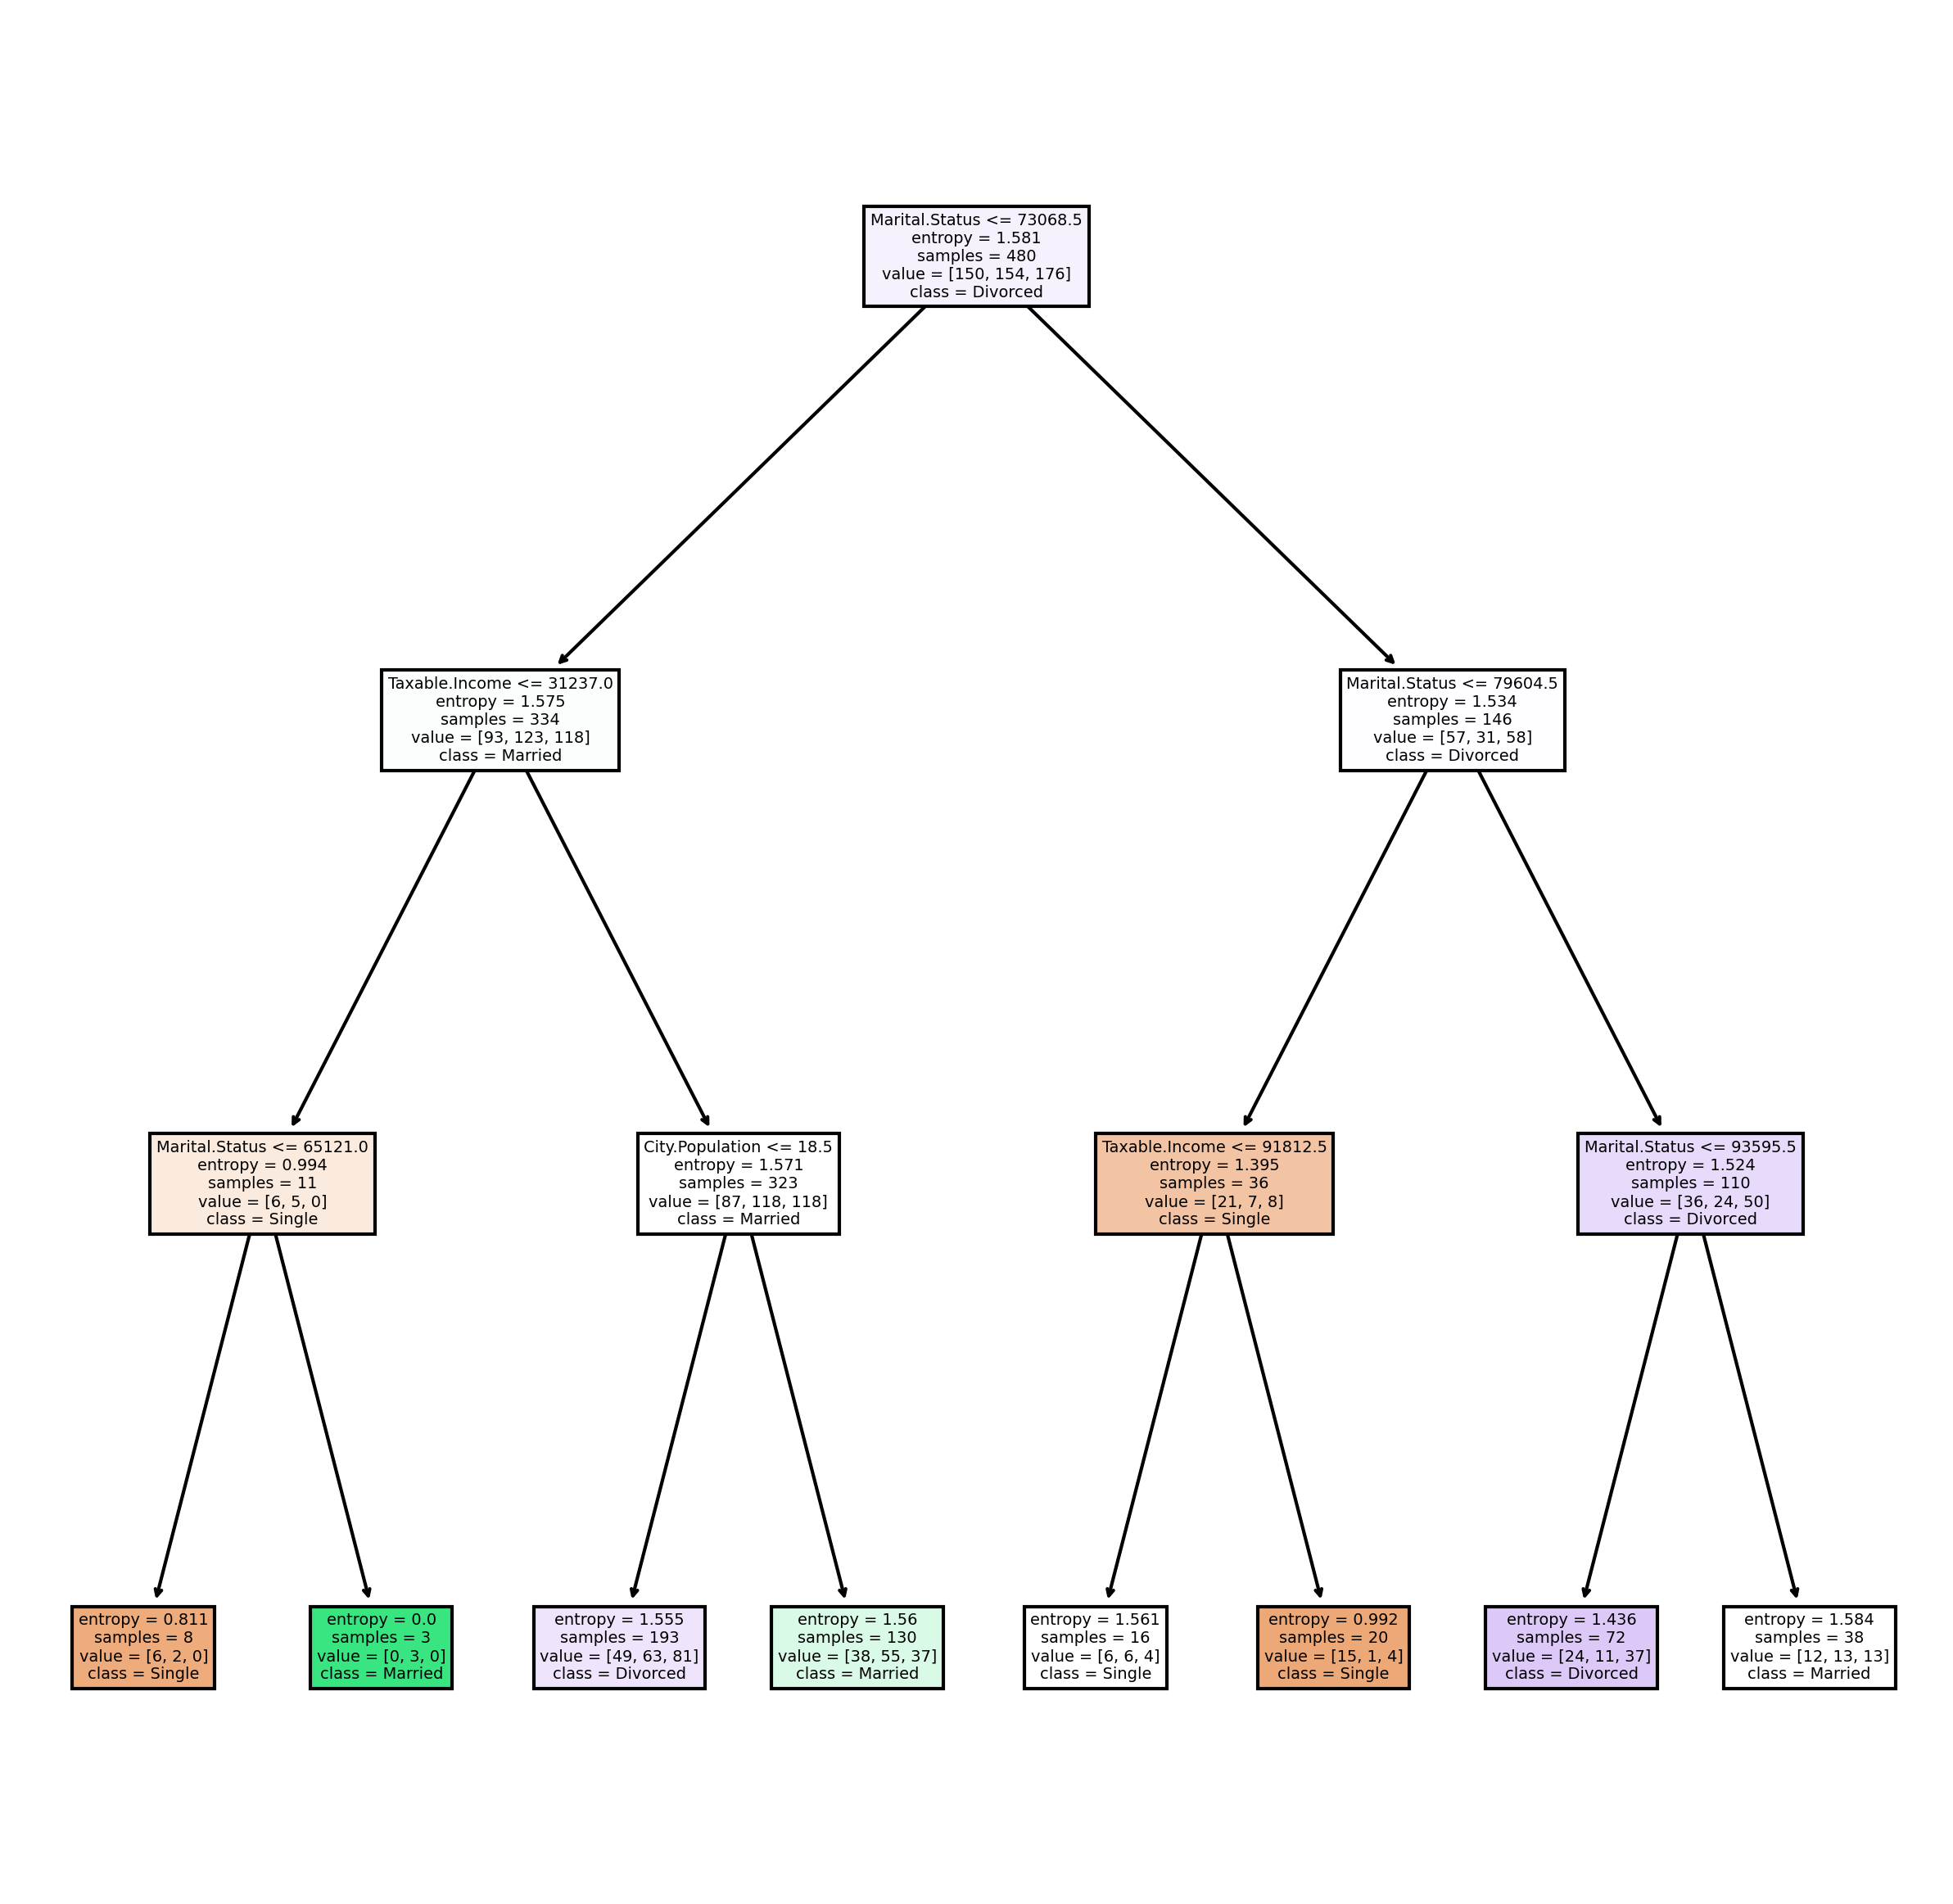

In [19]:
fn=['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn=['Single', 'Married', 'Divorced']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 